In [1]:
from tensorflow.keras.layers import Input, Conv2D, LeakyReLU, add, concatenate,Conv2DTranspose
from tensorflow.keras.initializers import HeNormal, RandomNormal
from tensorflow.keras.models import Model
import tensorflow as tf

In [2]:
def Upper_Branch(upscale_factor=2, channels=3):
    inputs = Input(shape=(None, None, channels))
    C1 = Conv2D(3, 3, padding = 'same',kernel_initializer=HeNormal())(inputs)
    L1 = LeakyReLU(alpha=0.2)(C1)
    C2 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L1)
    L2 = LeakyReLU(alpha=0.2)(C2)
    C3 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L2)
    L3 = LeakyReLU(alpha=0.2)(C3)
    C4 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L3)
    L4 = LeakyReLU(alpha=0.2)(C4)
    C5 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L4)
    L5 = LeakyReLU(alpha=0.2)(C5)
    C6 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L5)
    L6 = LeakyReLU(alpha=0.2)(C6)
    C7 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L6)
    L7 = LeakyReLU(alpha=0.2)(C7)
    C8 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L7)
    L8 = LeakyReLU(alpha=0.2)(C8)
    C9 = Conv2D(32, 3, padding = 'same',kernel_initializer=HeNormal())(L8)
    L9 = LeakyReLU(alpha=0.2)(C9)
    C10 = Conv2D(3, 3, padding = 'same',kernel_initializer=HeNormal())(L9)
    L10 = LeakyReLU(alpha=0.2)(C10)
    sum1 = add(inputs=[inputs, L10])
    model = Model(inputs= inputs, outputs=sum1)
    return model
model = Upper_Branch()

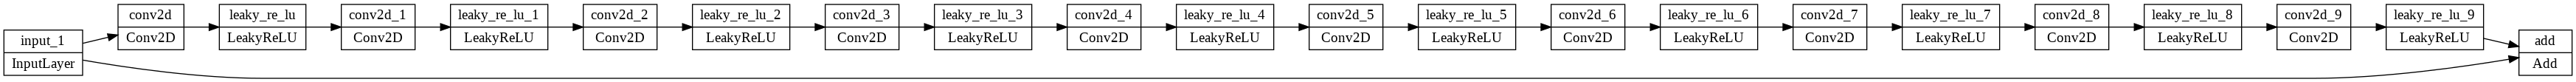

In [3]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [4]:
#######################SFEB#########################################
def SFEB_Block(upscale_factor=4, channels=3):
    inputs = Input(shape=(None, None, channels))
    C1 = Conv2D(3, 5, padding='same',kernel_initializer=HeNormal())(inputs)
    L1 = LeakyReLU(alpha=0.2)(C1)
    C2 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(L1)
    sum2 = add(inputs=[inputs, C1,C2])
    model = Model(inputs= inputs, outputs=sum2)
    return model
model = SFEB_Block()

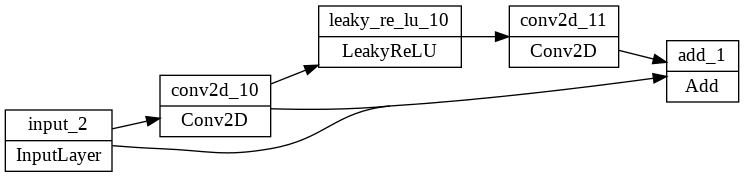

In [5]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [6]:
######################CAB BLOCK#####################################
def CAB_Block(upscale_factor=4, channels=3):
    inputs = Input(shape=(None, None, channels))
    C1 = Conv2D(3, 1, padding = 'same',kernel_initializer=HeNormal())(inputs)
    L1 = LeakyReLU(alpha=0.2)(C1)
    sum1 = add(inputs=[inputs, L1])
    C2 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(sum1)
    model = Model(inputs= inputs, outputs=C2)
    return model
model = CAB_Block()

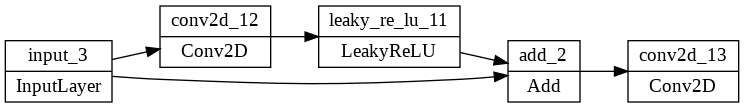

In [7]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [8]:
######################SCUB BLOCK#####################################
def SCUB_Block(upscale_factor=4, channels=3):
    inputs = Input(shape=(None, None, channels))
    LA = LeakyReLU(alpha=0.2)(inputs)
    C1 = Conv2D(3, 5, padding = 'same',kernel_initializer=HeNormal())(LA)
    L1 = LeakyReLU(alpha=0.2)(C1)
    C2 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(LA)
    L2 = LeakyReLU(alpha=0.2)(C2)
    sum1 = add(inputs=[L1, L2])
    C3 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(sum1)
    L3 = LeakyReLU(alpha=0.2)(C3)
    sum2 = add(inputs=[inputs, L3])
    model = Model(inputs= inputs, outputs=sum2)
    return model
model = SCUB_Block()

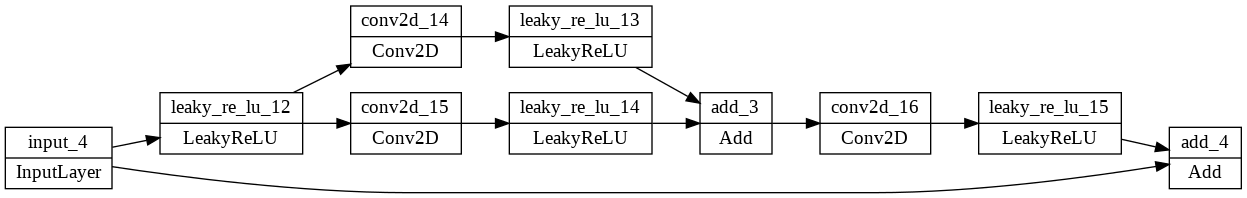

In [9]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [10]:
#######################SEB BLOCK#####################################
def SEB_Block(upscale_factor=4, channels=3):
    inputs = Input(shape=(None, None, channels))
    #SQUEEZE STAGE
    PC1 = Conv2D(3,(1,1),padding='same',kernel_initializer=HeNormal())(inputs)
    PC2 = Conv2D(3,(1,1),padding='same',kernel_initializer=HeNormal())(inputs)
    PC3 = Conv2D(3,(1,1),padding='same',kernel_initializer=HeNormal())(inputs)
    PC4 = Conv2D(3,(1,1),padding='same',kernel_initializer=HeNormal())(inputs)
    Sum1 = add([PC1,PC2,PC3,PC4])
    PPC1 = LeakyReLU(alpha=0.2)(Sum1)
    
    #EXPAND STAGE
    PC5 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC5  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC5)
    
    PC6 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC6  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC6)
    
    PC7 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC7  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC7)
    
    PC8 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC8  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC8)
    
    PC9 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC9  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC9)
    
    PC10 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC10  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC10)
    
    PC11 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC11  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC11)
    
    PC12 = Conv2D(64,(1,1),padding='same',kernel_initializer=HeNormal())(PPC1)
    DWC12  = Conv2D(3,(3,3),padding='same',kernel_initializer=HeNormal())(PC12)
    
    Sum2  = add([DWC5,DWC6,DWC7,DWC8,DWC9,DWC10,DWC11,DWC12])
    PPC2 = LeakyReLU(alpha=0.2)(Sum2)
    #C4 = layers.Conv2D(channels * (upscale_factor ** 2), 3, padding='same')(Sum2)
    #outputs = tf.nn.depth_to_space(C4, upscale_factor)
    model = Model(inputs= inputs, outputs=PPC2)
    return model
model = SEB_Block()

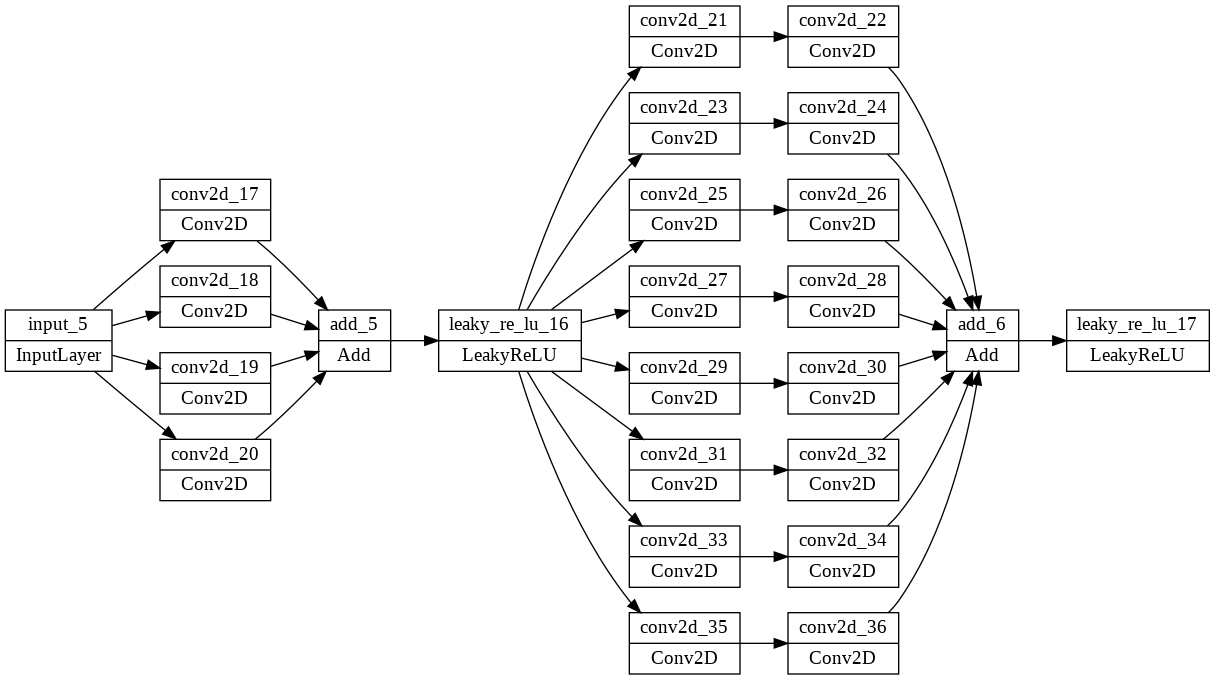

In [11]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)

In [12]:
def SENext(scale):
    X_in = Input(shape=(None, None, 3))
    C11 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(X_in)
    LA = LeakyReLU(alpha=0.2)(C11)
    #C11 = Conv2D(1,3, padding='same',kernel_initializer=HeNormal())(LA)
    SFEB1 = SFEB_Block()(LA)
    sum1 = add ([X_in, SFEB1]) 
    C22 = Conv2D(3,3, padding='same',kernel_initializer=HeNormal())(sum1)
    SEB1 = SEB_Block()(C22)
    sum2  = add([X_in,SEB1])
    C1 = Conv2D(3,3, padding='same', kernel_initializer=HeNormal())(sum2)
    SEB2 = SEB_Block()(C1)
    sum3  = add([X_in,SEB2])
    C2 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(sum3)
    SEB3 = SEB_Block()(C2)
    C3 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(SEB3)
    SCUB1 = SCUB_Block()(C3)
    C4 = Conv2D(3, 3, padding='same',kernel_initializer=HeNormal())(SCUB1)
    CAB1 = CAB_Block()(C4)
    outputs1 = Upper_Branch()(CAB1)
    conc = concatenate([X_in,SFEB1,SEB1,SEB2,SEB3,outputs1], axis = -1)
    T = Conv2DTranspose(3, 9, strides=scale, padding='same',kernel_initializer=RandomNormal(mean=0.0, stddev=0.001))(conc)
    X_out = tf.clip_by_value(T, 0.0, 1.0)
    return Model(X_in, X_out)
model = SENext(scale=8)

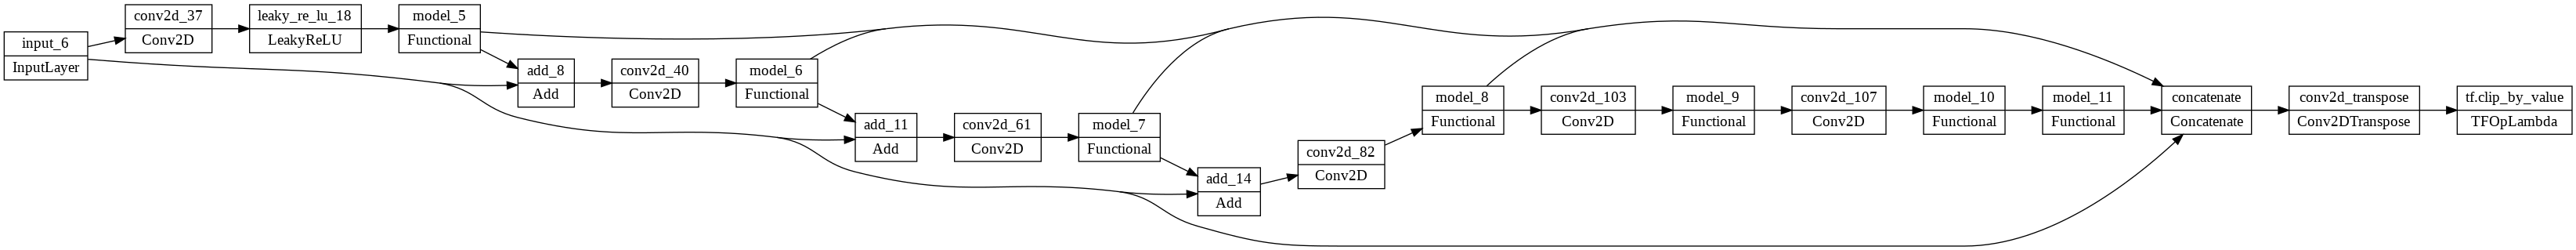

In [13]:
tf.keras.utils.plot_model(
    model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='LR', expand_nested=False, dpi=96
)